(0, 2)


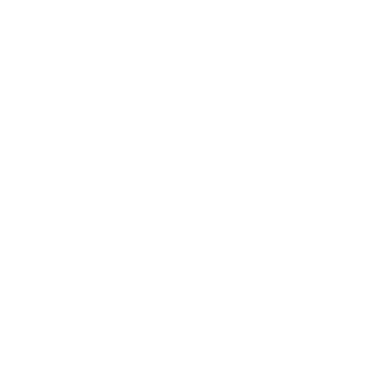

In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

# Importing libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# Visualization
x_data = []
y_data = []

# Iterate through image directories
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        
        # Ensure the image is valid
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            x_data.append(img_array)
            y_data.append(os.path.basename(category))  # Get the folder name (category)

# Create DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Check the shape of the dataset
print(data.shape)

# Visualization with Pie chart
labels = data.label.value_counts().index  # Get unique category names
colors = ['#a0d157', '#c48bb8'][:len(labels)]  # Adjust colors based on the number of labels
explode = [0.05] * len(labels)  # Adjust explode to match the number of labels

# Create the pie chart
plt.pie(data.label.value_counts(), 
        labels=labels, 
        autopct='%0.3f%%', 
        colors=colors, 
        startangle=90, 
        explode=explode)  # Explode all slices for visual effect
plt.show()
